In [14]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [28]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    fft_image = np.fft.fft2(im)
    fft_theorem = fft_image * fft_kernel
    fft_inv = np.fft.ifft2(fft_theorem).real

    print(fft_kernel.shape)
    

    conv_result = fft_inv
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.subplot(1, 5, 2) 
        # Visualize FFT
        plt.imshow(np.log(np.fft.fftshift(np.abs(fft_image))), cmap="gray")

        plt.subplot(1, 5, 3)
        # Visualize FFT kernel
        plt.imshow(np.fft.fftshift(np.abs(fft_kernel)), cmap="gray")

        plt.subplot(1, 5, 4)
        # Visualize filtered FFT image
        plt.imshow(np.log(np.fft.fftshift(np.abs(fft_theorem))), cmap="gray")


        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(utils.uint8_to_float(fft_inv), cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

(512, 512)
(512, 512)


C:\Users\nikla\AppData\Local\Temp/ipykernel_16832/1315332746.py:43: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.fft.fftshift(np.abs(fft_theorem))), cmap="gray")


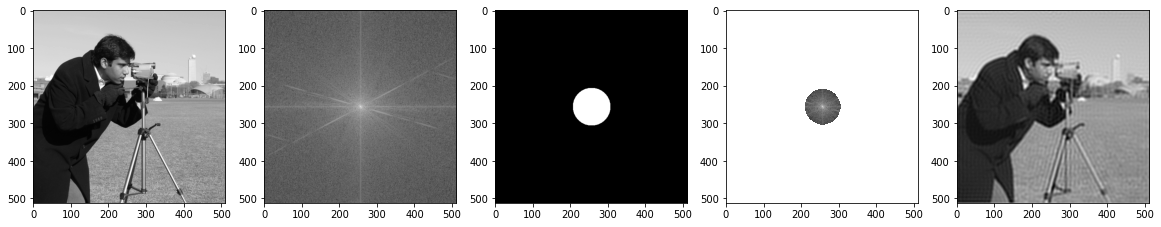

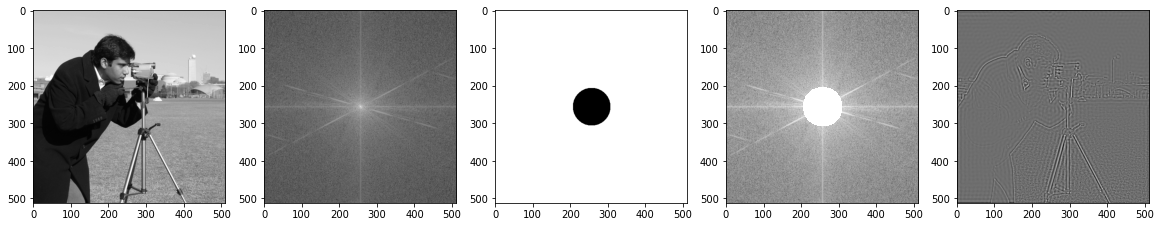

Saving image to: image_processed\camera_low_pass.png
Saving image to: image_processed\camera_high_pass.png


In [29]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)